In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import statsmodels.api as sm

## US FRED data
To chart the supply of US dollars over the past 10 years using real data, you can fetch the data from a reliable source and then use the matplotlib library in Python to create the chart. Here's an example code snippet that demonstrates how to do this:

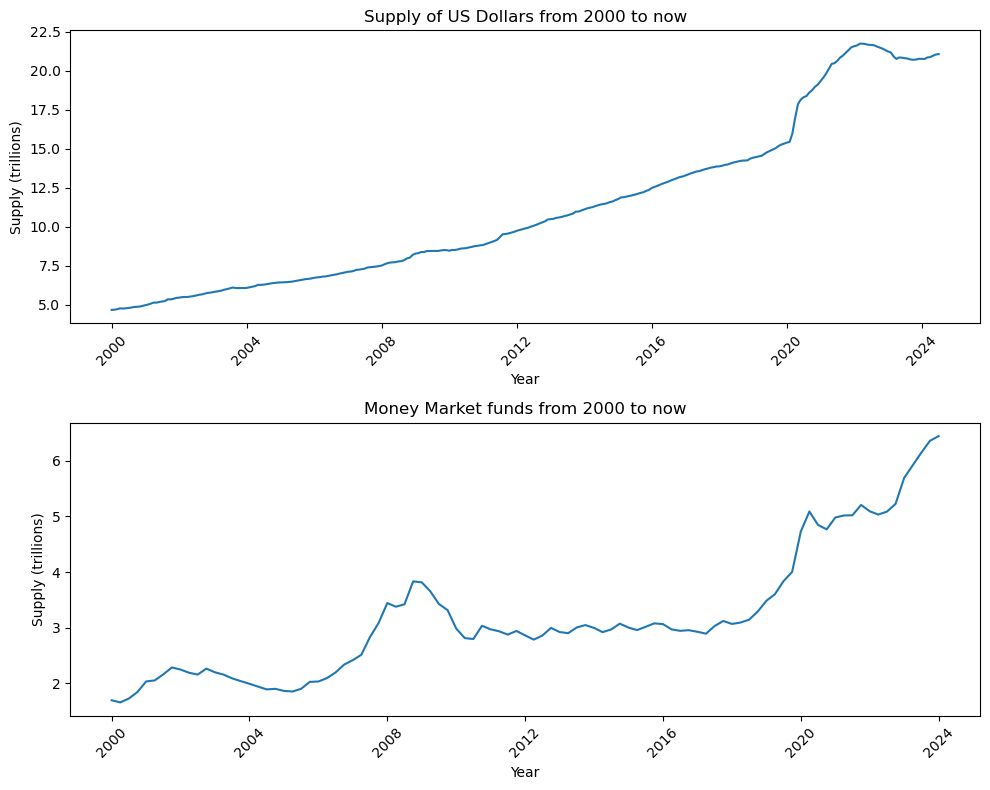

In [17]:
# Set the start date for the data
start_date = '2000-01-01'
# Set the end date as the current date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')
# Fetch the M2 money supply data from FRED using pandas data reader
M2 = pdr.DataReader('M2SL', 'fred', start_date, end_date)
# Fetch the Money Market funds data from FRED using pandas data reader
df = pdr.DataReader('MMMFFAQ027S', 'fred', start_date, end_date)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
# Plotting the M2 money supply data as a line graph
ax1.plot(M2.index, M2['M2SL'] / 1000)
ax1.set_title("Supply of US Dollars from 2000 to now")
ax1.set_xlabel("Year")
ax1.set_ylabel("Supply (trillions)")
ax1.tick_params(axis='x', rotation=45)
# Plotting the Money Market funds data as a line graph
ax2.plot(df.index, df['MMMFFAQ027S'] / 1000000)
ax2.set_title("Money Market funds from 2000 to now")
ax2.set_xlabel("Year")
ax2.set_ylabel("Supply (trillions)")
ax2.tick_params(axis='x', rotation=45)
# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [1]:
# Fetch data from FRED using pandas data reader
start_date = '2004-01-01'
end_date = '2024-01-01'
assets = pdr.DataReader('WALCL', 'fred', start_date, end_date)
inflation = pdr.DataReader('CPIAUCNS', 'fred', start_date, end_date)
overnight_rate = pdr.DataReader('DFF', 'fred', start_date, end_date)

# Calculate percentage changes
assets_pct = assets['WALCL'].pct_change() * 100
cpi_pct = inflation['CPIAUCNS'].pct_change() * 100

# Calculate log differences
log_diff = np.log(assets['WALCL']).diff()

# Scale the overnight rate to decimal
overnight_rate_decimal = overnight_rate['DFF'] / 100

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the percentage changes
ax1.plot(assets_pct.index, assets_pct, label='Percentage Changes of US Assets')
ax1.plot(cpi_pct.index, cpi_pct, label='Inflation (CPI)', color='r')
ax1.set_title('Percentage Changes of US Assets and Inflation (CPI)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage Change (%)')
ax1.legend()
ax1.grid(True)

# Plot the log differences and scaled overnight rate
ax2.plot(log_diff.index, log_diff, label='Log Differences of US Assets')
ax2.plot(overnight_rate_decimal.index, overnight_rate_decimal, label='Overnight Rate', color='g')
ax2.set_title('Log Differences of US Assets and Overnight Rate')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()
ax2.grid(True)

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Set x-axis limits
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

# Adjust layout for better readability
plt.tight_layout()
plt.show()

NameError: name 'pdr' is not defined

## Canadian GDP

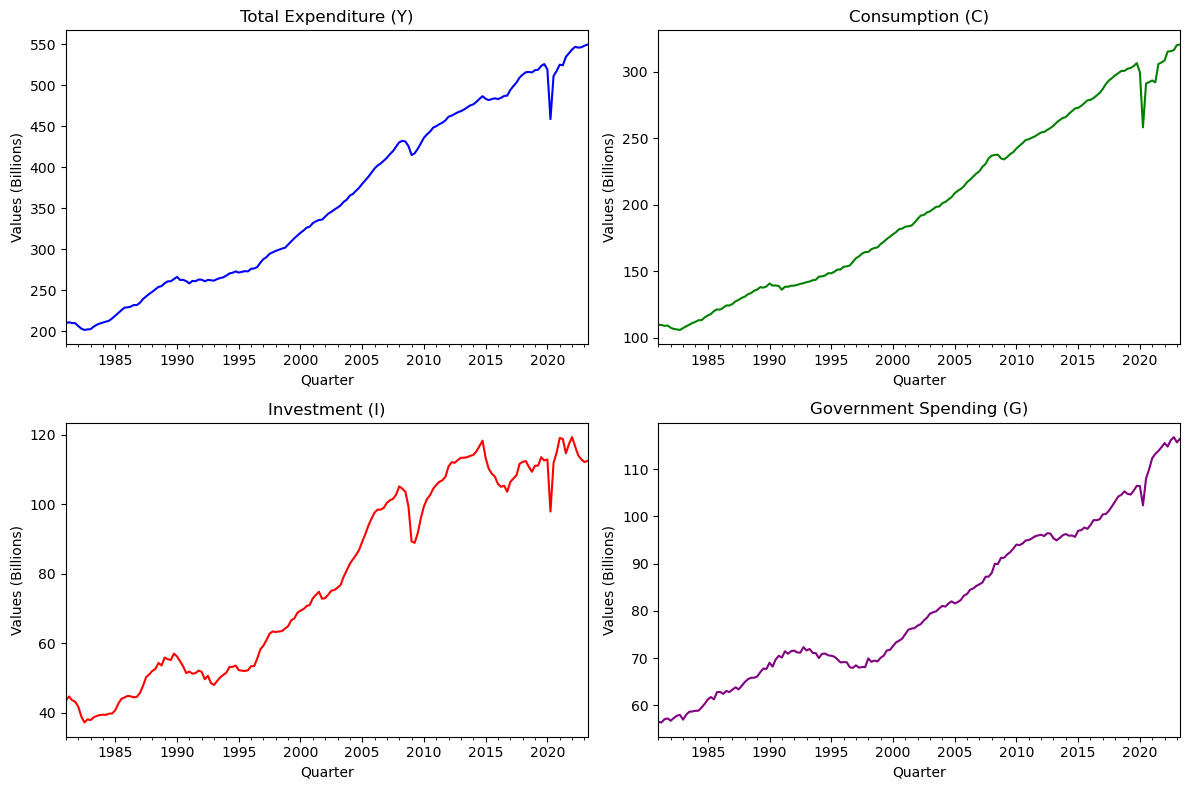

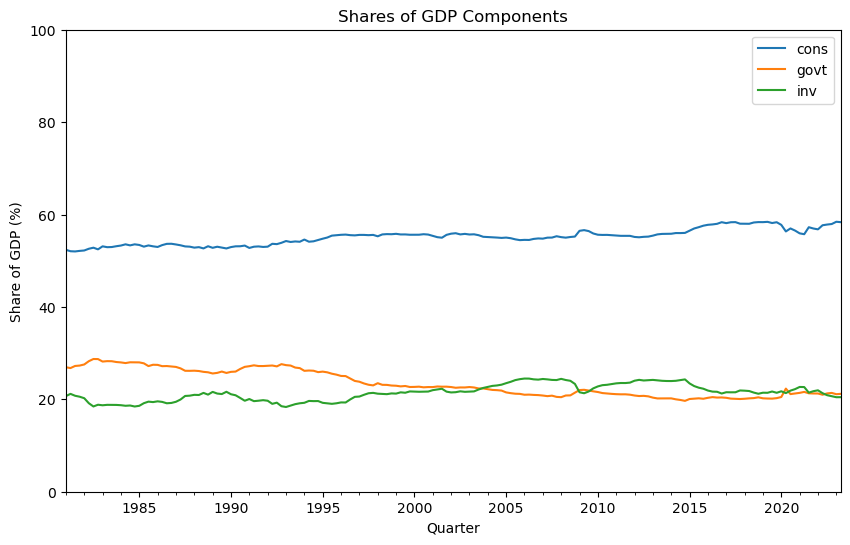

In [10]:
# Load the data from the text file
file_path = 'CA_data.txt' 
df = pd.read_csv(file_path, delim_whitespace=True) 
# Convert the 'Quarter' column to Datetime format and set as index
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.set_index('Quarter', inplace=True)

# Create Y column as the sum of 'I', 'G', and 'C'
df['Y'] = (df['I'] + df['G'] + df['C'])
# Convert all columns to billions (for plotting purposes)
df /= 1e9
# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Plot 'Y' in the first subplot
df['Y'].plot(ax=axes[0, 0], color='blue', linestyle='-', marker='')
axes[0, 0].set_title('Total Expenditure (Y)')
axes[0, 0].set_ylabel('Values (Billions)')
# Plot 'C' in the second subplot
df['C'].plot(ax=axes[0, 1], color='green', linestyle='-', marker='')
axes[0, 1].set_title('Consumption (C)')
axes[0, 1].set_ylabel('Values (Billions)')
# Plot 'I' in the third subplot
df['I'].plot(ax=axes[1, 0], color='red', linestyle='-', marker='')
axes[1, 0].set_title('Investment (I)')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Values (Billions)')
# Plot 'G' in the fourth subplot
df['G'].plot(ax=axes[1, 1], color='purple', linestyle='-', marker='')
axes[1, 1].set_title('Government Spending (G)')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Values (Billions)')
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()

# Compute the shares of total GDP for each component
df['cons'] = df['C'] / df['Y'] * 100
df['govt'] = df['G'] / df['Y'] * 100
df['inv'] = df['I'] / df['Y'] * 100
# Create a subplot layout
fig, ax = plt.subplots(figsize=(10, 6))
# Plot shares in the same graph
df[['cons', 'govt', 'inv']].plot(ax=ax, linestyle='-', marker='')
# Set y-axis limits to go from 0 to 100
ax.set_ylim(0, 100)
# Set plot labels and title
plt.title('Shares of GDP Components')
plt.xlabel('Quarter')
plt.ylabel('Share of GDP (%)')
# Show the plot
plt.show()

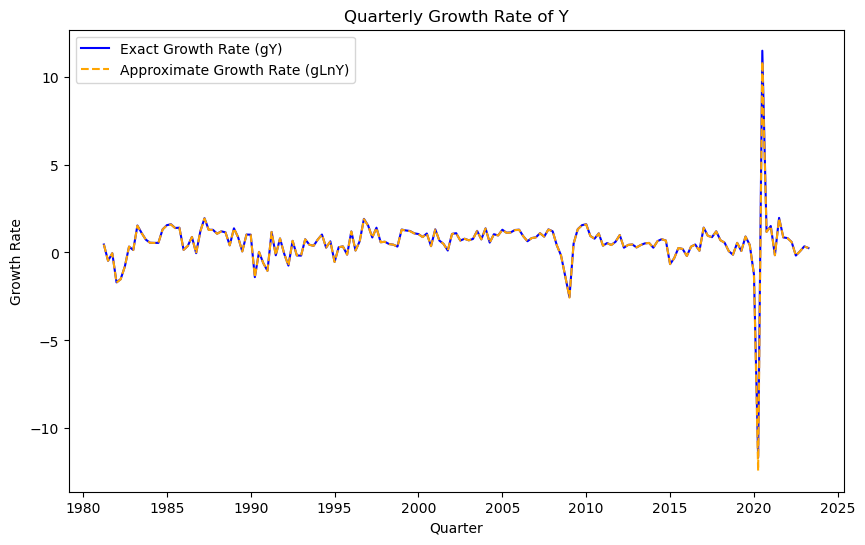

Percentage Deviation: 0.45662374520897137%


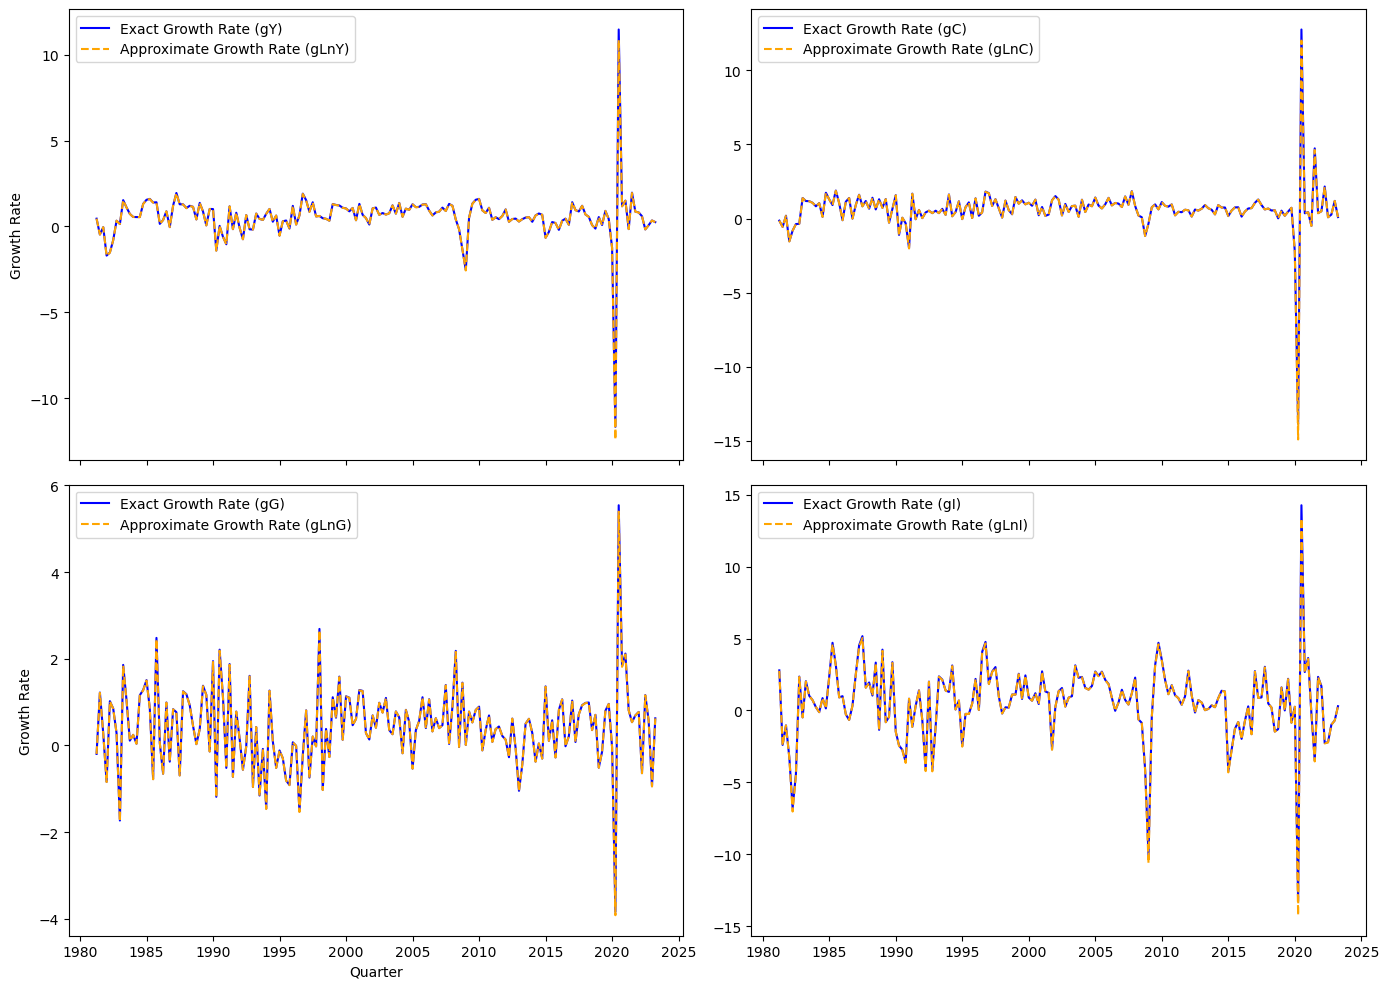

Averages and Standard Deviations:
       Average  Standard Deviation
gY    0.581744            2.620942
gC    0.569571            1.630851
gI    0.598939            0.941331
gG    0.649087            1.448793
gLnY  0.432773            1.459846
gLnC  0.562884            2.637472
gLnI  0.633596            1.654139
gLnG  0.427481            0.936013

Correlation Matrix:
          gY        gI        gC        gG
gY  1.000000  0.811308  0.942299  0.576212
gI  0.811308  1.000000  0.605532  0.281520
gC  0.942299  0.605532  1.000000  0.487783
gG  0.576212  0.281520  0.487783  1.000000


In [14]:
file_path = 'CA_data.txt' 
df = pd.read_csv(file_path, delim_whitespace=True)
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.set_index('Quarter', inplace=True)
df['Y'] = df['I'] + df['G'] + df['C']
# Compute the quarterly growth rate of Y using exact definition
df['gY'] = ((df['Y'] - df['Y'].shift(1)) / df['Y'].shift(1)) * 100
# Compute the quarterly growth rate of Y using approximate formula
df['gLnY'] = np.log(df['Y']).diff() * 100
# Create a subplot layout
fig, ax = plt.subplots(figsize=(10, 6))
# Plot 'gY' with a solid line and 'gLnY' with a dashed line
ax.plot(df.index, df['gY'], label='Exact Growth Rate (gY)', linestyle='-', marker='', color='blue')
ax.plot(df.index, df['gLnY'], label='Approximate Growth Rate (gLnY)', linestyle='--', marker='', color='orange')
# Plotting labels
plt.title('Quarterly Growth Rate of Y')
plt.xlabel('Quarter')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()
# Compute percentage deviation between 'gY' and 'gLnY'
percentage_deviation = abs((df['gY'] - df['gLnY']) / ((df['gY'] + df['gLnY']) / 2)) * 100
# Print the average of percentage_deviation
average_percentage_deviation = percentage_deviation.mean()
print(f'Percentage Deviation: {average_percentage_deviation}%')

# Compute the quarterly growth rates using exact definition
df['gY'] = ((df['Y'] - df['Y'].shift(1)) / df['Y'].shift(1)) * 100
df['gI'] = ((df['I'] - df['I'].shift(1)) / df['I'].shift(1)) * 100
df['gC'] = ((df['C'] - df['C'].shift(1)) / df['C'].shift(1)) * 100
df['gG'] = ((df['G'] - df['G'].shift(1)) / df['G'].shift(1)) * 100
# Compute the quarterly growth rates using approximate formula
df['gLnY'] = np.log(df['Y']).diff() * 100
df['gLnI'] = np.log(df['I']).diff() * 100
df['gLnC'] = np.log(df['C']).diff() * 100
df['gLnG'] = np.log(df['G']).diff() * 100
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
# Plot Y subplot
axs[0, 0].plot(df.index, df['gY'], label='Exact Growth Rate (gY)', linestyle='-', color='blue')
axs[0, 0].plot(df.index, df['gLnY'], label='Approximate Growth Rate (gLnY)', linestyle='--', color='orange')
axs[0, 0].set_ylabel('Growth Rate')
axs[0, 0].legend()
# Plot Con subplot
axs[0, 1].plot(df.index, df['gC'], label='Exact Growth Rate (gC)', linestyle='-', color='blue')
axs[0, 1].plot(df.index, df['gLnC'], label='Approximate Growth Rate (gLnC)', linestyle='--', color='orange')
axs[0, 1].legend()
# Plot Gov subplot
axs[1, 0].plot(df.index, df['gG'], label='Exact Growth Rate (gG)', linestyle='-', color='blue')
axs[1, 0].plot(df.index, df['gLnG'], label='Approximate Growth Rate (gLnG)', linestyle='--', color='orange')
axs[1, 0].set_xlabel('Quarter')
axs[1, 0].set_ylabel('Growth Rate')
axs[1, 0].legend()
# Plot Inv subplot
axs[1, 1].plot(df.index, df['gI'], label='Exact Growth Rate (gI)', linestyle='-', color='blue')
axs[1, 1].plot(df.index, df['gLnI'], label='Approximate Growth Rate (gLnI)', linestyle='--', color='orange')
axs[1, 1].legend()
# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()
# Create a DataFrame to store the averages and standard deviations
stats_df = pd.DataFrame({
    'Average': [df['gY'].mean(), df['gLnY'].mean(), df['gI'].mean(), df['gC'].mean(), df['gG'].mean(), df['gLnI'].mean(), df['gLnC'].mean(), df['gLnG'].mean()],
    'Standard Deviation': [df['gI'].std(), df['gC'].std(), df['gG'].std(), df['gY'].std(), df['gLnY'].std(), df['gLnI'].std(), df['gLnC'].std(), df['gLnG'].std()]
}, index=['gY', 'gC', 'gI', 'gG', 'gLnY', 'gLnC', 'gLnI', 'gLnG'])
# Display the table
print("Averages and Standard Deviations:")
print(stats_df)
# Create a DataFrame to store the correlations
correlation_df = df[['gY', 'gI', 'gC', 'gG']].corr()
# Display the correlation table
print("\nCorrelation Matrix:")
print(correlation_df)

### US Consumption, Investment, Output and interest rate

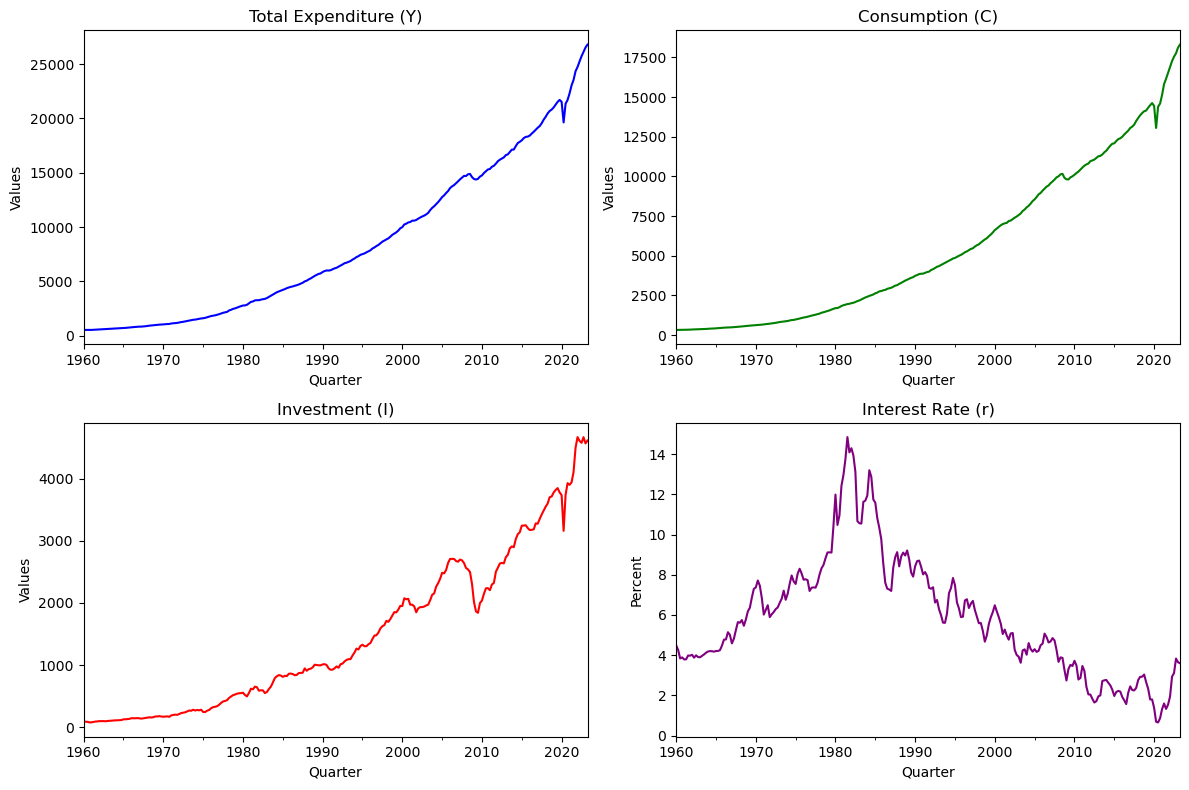

In [28]:
# Load the data from the text file
file_path = 'US_data.txt' 
df = pd.read_csv(file_path, delim_whitespace=True) 
# Convert the 'Quarter' column to Datetime format and set as index
df['Quarter'] = pd.to_datetime(df['Quarter'])
df.set_index('Quarter', inplace=True)
#PCEC=C GDP=Y IR=r GPDI=I
# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Plot 'Y' in the first subplot
df['GDP'].plot(ax=axes[0, 0], color='blue', linestyle='-', marker='')
axes[0, 0].set_title('Total Expenditure (Y)')
axes[0, 0].set_ylabel('Values')
# Plot 'C' in the second subplot
df['PCEC'].plot(ax=axes[0, 1], color='green', linestyle='-', marker='')
axes[0, 1].set_title('Consumption (C)')
axes[0, 1].set_ylabel('Values')
# Plot 'I' in the third subplot
df['GDPI'].plot(ax=axes[1, 0], color='red', linestyle='-', marker='')
axes[1, 0].set_title('Investment (I)')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Values')
# Plot 'r' in the fourth subplot
df['IR'].plot(ax=axes[1, 1], color='purple', linestyle='-', marker='')
axes[1, 1].set_title('Interest Rate (r)')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Percent')
# Adjust layout
plt.tight_layout()
# Show the pl

### OLS estimate where $ C_t = \alpha_0 + \alpha_1 Y_t + \alpha_2 r_t + \varepsilon_{t_C} $

                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.269e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:40:49   Log-Likelihood:                -1459.0
No. Observations:                 254   AIC:                             2924.
Df Residuals:                     251   BIC:                             2935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4708     18.219      1.069      0.2

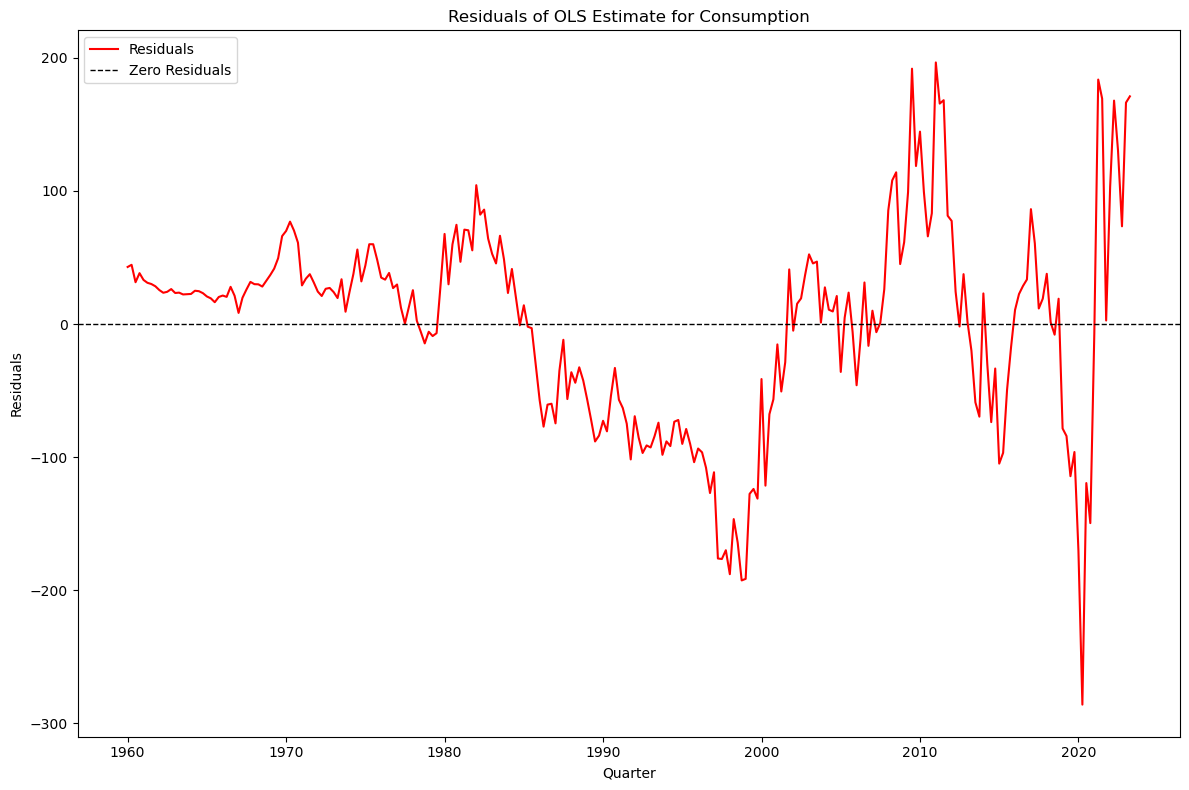

In [25]:
# Define the dependent variable (y) and independent variables (X)
y = df['PCEC']
X = df[['GDP', 'IR']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
Cmodel = sm.OLS(y, X).fit()
# Print the regression results
print(Cmodel.summary())
# Get the residuals from the OLS model
residuals = Cmodel.resid
# Plot the residuals
plt.figure(figsize=(12, 8))
plt.plot(df.index, residuals, color='red', linestyle='-', marker='', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Residuals')
plt.title('Residuals of OLS Estimate for Consumption')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

### OLS estimate where $ I_t = \beta_0 + \beta_1 r_t + \varepsilon_{t_I} $

                            OLS Regression Results                            
Dep. Variable:                   GDPI   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     146.9
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           6.08e-27
Time:                        16:40:54   Log-Likelihood:                -2112.7
No. Observations:                 254   AIC:                             4229.
Df Residuals:                     252   BIC:                             4236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2958.9588    138.393     21.381      0.0

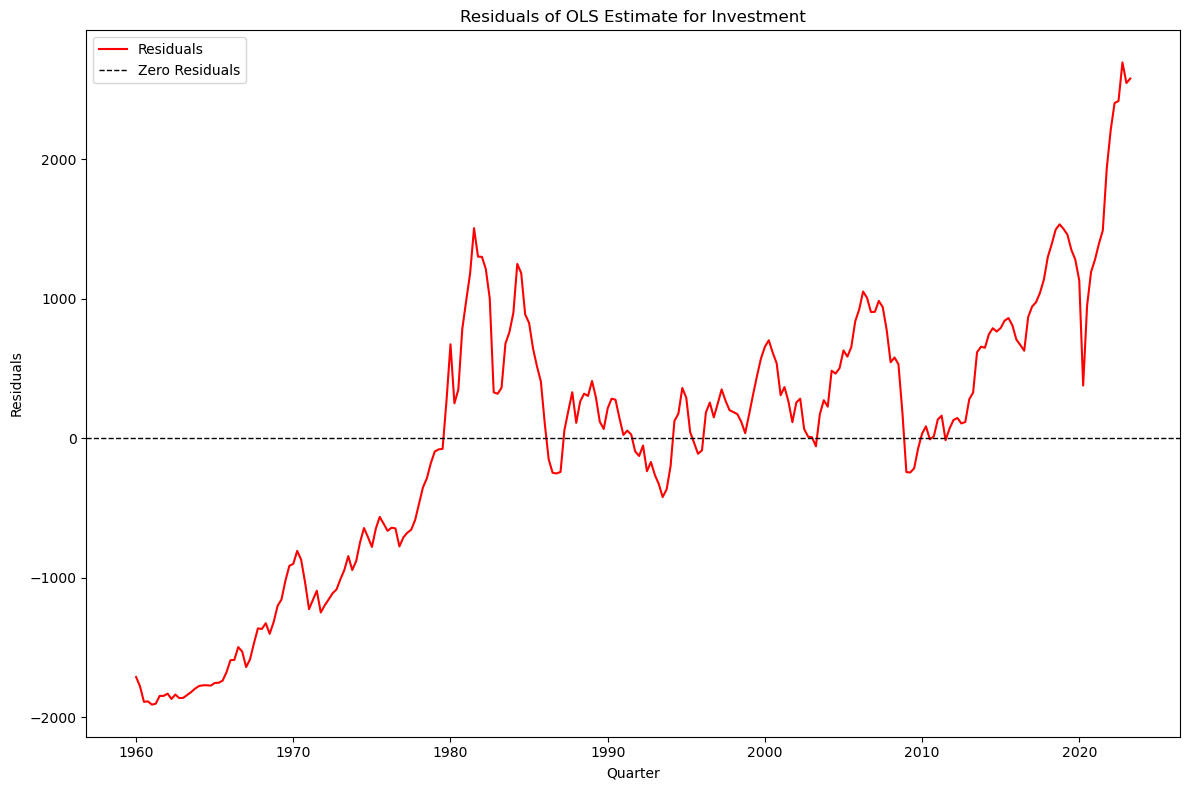

In [26]:
# Define the dependent variable (y) and independent variables (X)
y = df['GDPI']
X = df[['IR']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
Imodel = sm.OLS(y, X).fit()
# Print the regression results
print(Imodel.summary())
# Get the residuals from the OLS model
residuals = Imodel.resid
# Plot the residuals
plt.figure(figsize=(12, 8))
plt.plot(df.index, residuals, color='red', linestyle='-', marker='', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Residuals')
plt.title('Residuals of OLS Estimate for Investment')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

### OLS estimate where $ C_t = \alpha_0 + \alpha_1 Y_t + \alpha_2 r_t + \varepsilon_C $

In [4]:
# Create a variable representing time
df['Time'] = range(1, len(df) + 1)
# Define the dependent variable (y) and independent variables (X)
y = df['PCEC']
X = df[['GDP', 'IR', 'Time']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
model = sm.OLS(y, X).fit()
# Print the regression results
print(model.summary())

NameError: name 'df' is not defined

### OLS estimate where $ I_t = \beta_0 + \beta_1 r_t + \beta_2 t + \varepsilon_{t_I} $

                            OLS Regression Results                            
Dep. Variable:                   PCEC   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.609e+05
Date:                Wed, 04 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:45:46   Log-Likelihood:                -1424.0
No. Observations:                 254   AIC:                             2856.
Df Residuals:                     250   BIC:                             2870.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5065     16.008      2.218      0.0

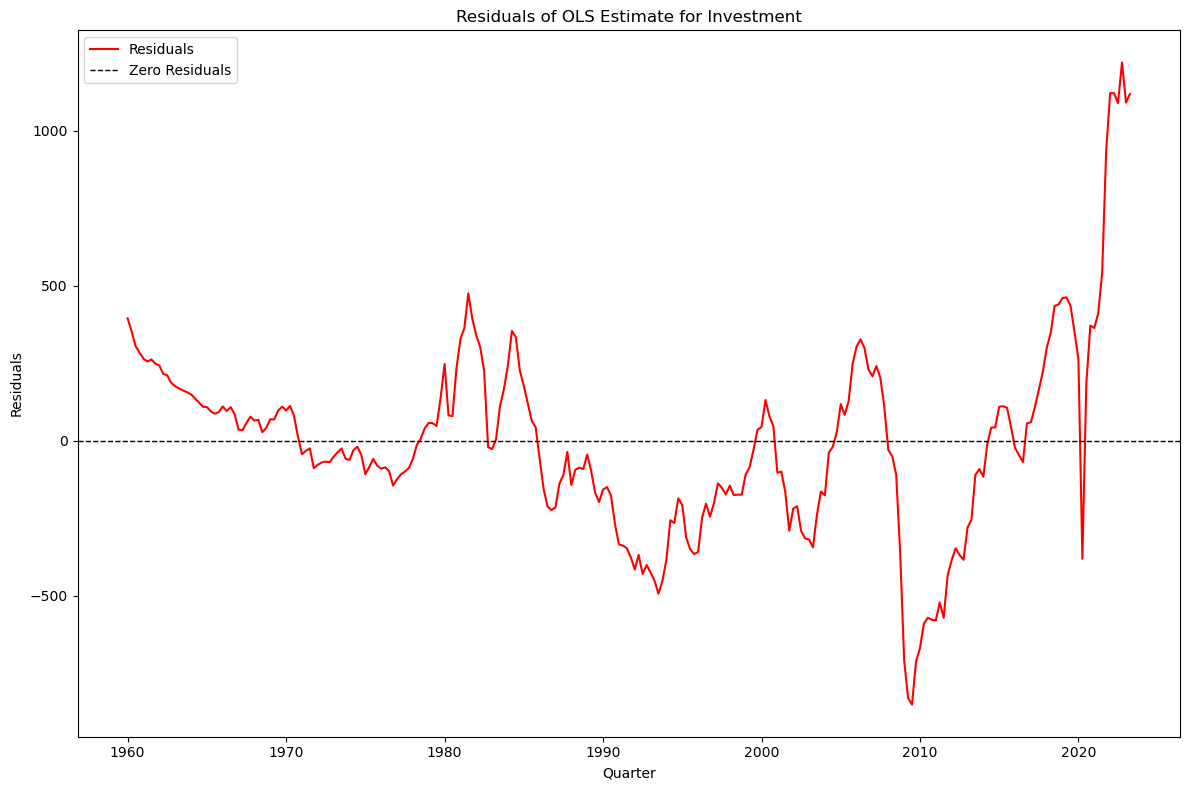

In [31]:
# Create a variable representing time
df['Time'] = range(1, len(df) + 1)
# Define the dependent variable (y) and independent variables (X)
y = df['PCEC']
X = df[['GDP', 'IR', 'Time']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
Cmodel = sm.OLS(y, X).fit()
# Print the regression results
print(Cmodel.summary())

# Same process for Investment function
y = df['GDPI']
X = df[['IR', 'Time']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
Imodel = sm.OLS(y, X).fit()
# Print the regression results
print(Imodel.summary())
# Get the residuals from the OLS model
Iresiduals = Imodel.resid

# Plot the residuals
plt.figure(figsize=(12, 8))
plt.plot(df.index, Iresiduals, color='red', linestyle='-', marker='', label='Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Residuals')
plt.title('Residuals of OLS Estimate for Investment')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()

### OLS estimate where $ I_t = \beta_0 + \beta_1 r_t + \beta_2 t + \beta_3 Y_t + \varepsilon_{t_I} $

                            OLS Regression Results                            
Dep. Variable:                   GDPI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     6342.
Date:                Wed, 04 Sep 2024   Prob (F-statistic):          1.64e-235
Time:                        16:46:04   Log-Likelihood:                -1619.1
No. Observations:                 254   AIC:                             3246.
Df Residuals:                     250   BIC:                             3260.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -80.4341     34.520     -2.330      0.0

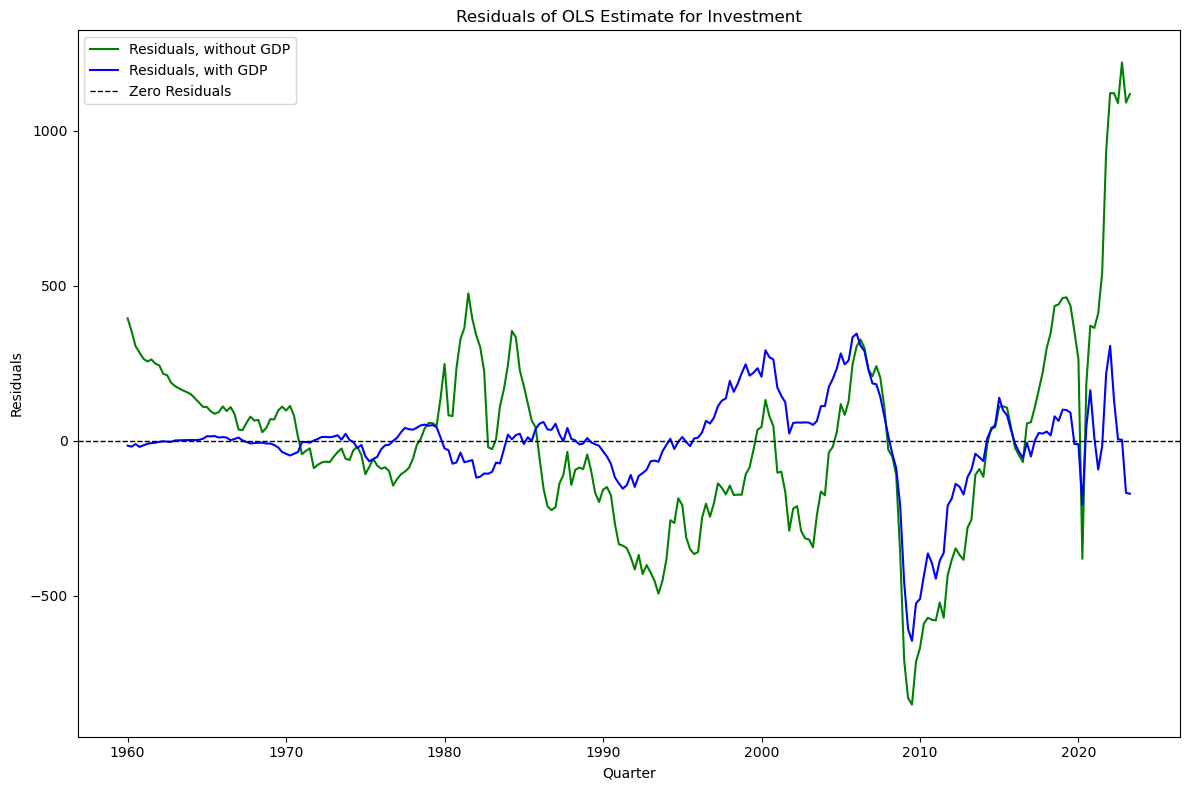

In [32]:
# Define the dependent variable (y) and independent variables (X)
y = df['GDPI']
X = df[['IR', 'GDP', 'Time']]
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the OLS model
model = sm.OLS(y, X).fit()
# Print the regression results
print(model.summary())
# Get the residuals from the OLS model
residuals = model.resid
plt.figure(figsize=(12, 8))
# Plot original inv function resid
plt.plot(df.index, Iresiduals, color='green', linestyle='-', marker='', label='Residuals, without GDP')
# Plot new inv funct resid
plt.plot(df.index, residuals, color='blue', linestyle='-', marker='', label='Residuals, with GDP')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Residuals')
plt.title('Residuals of OLS Estimate for Investment')
plt.xlabel('Quarter')
plt.ylabel('Residuals')
plt.legend()
plt.tight_layout()
plt.show()